(10, 3) (10, 3)


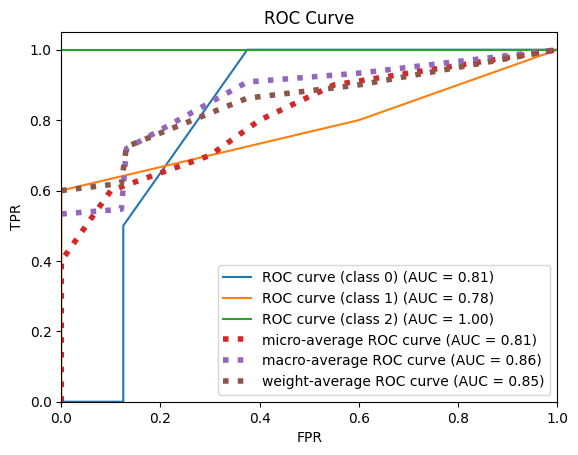

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, auc
y_true = np.asarray([[0,0,1],[0,1,0],[1,0,0],[0,0,1],[1,0,0],[0,1,0],[0,1,0],[0,1,0],[0,0,1],[0,1,0]])
y_pred = np.asarray([[0.1,0.2,0.7],[0.1,0.6,0.3],[0.5,0.2,0.3],[0.1,0.1,0.8],[0.4,0.2,0.4],[0.6,0.3,0.1],[0.4,0.2,0.4],[0.4,0.1,0.5],[0.1,0.1,0.8],[0.1,0.8,0.1]])
print(y_true.shape,y_pred.shape)
n_class=len(y_true[1,:])
fpr = dict()
tpr = dict()
roc_auc = dict()
#处理数据
for i in range(n_class):
    fpr[i],tpr[i],_= roc_curve(y_true[:,i],y_pred[:,i])
    roc_auc[i] = auc(fpr[i],tpr[i])
    plt.plot(fpr[i], tpr[i], label='ROC curve (class %d) (AUC = %0.2f)' % (i, roc_auc[i]))
fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_pred.ravel())# Micro的指标
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])# Micro的指标的auc
#Macro的指标
fpr_grid = np.linspace(0.0,1.0,100)
mean_tpr = np.zeros_like(fpr_grid)
for i in range(n_class):
    mean_tpr += np.interp(fpr_grid,fpr[i],tpr[i])
mean_tpr /= n_class

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"],tpr["macro"])
#Weighted 的指标
y_true_list=list([tuple(t) for t in y_true])
classNum = dict((a,y_true_list.count(a)) for a in y_true_list)
n1 = classNum[(1,0,0)]
n2 = classNum[(0,1,0)]
n3 = classNum[(0,0,1)]
ratio = [n1/(n1+n2+n3),n2/(n1+n2+n3),n3/(n1+n2+n3)]
avg_tpr = np.zeros_like(fpr_grid)
for i in range(n_class):
    avg_tpr +=ratio[i]*np.interp(fpr_grid,fpr[i],tpr[i])
fpr["weight"] = fpr_grid
tpr["weight"] = avg_tpr
roc_auc["weight"] = auc(fpr["weight"],tpr["weight"])
#绘图
plt.plot(fpr["micro"], tpr["micro"], label='micro-average ROC curve (AUC = %0.2f)' % roc_auc["micro"], linestyle=':', linewidth=4)
plt.plot(fpr["macro"], tpr["macro"], label='macro-average ROC curve (AUC = %0.2f)' % roc_auc["macro"], linestyle=':', linewidth=4)
plt.plot(fpr["weight"], tpr["weight"], label='weight-average ROC curve (AUC = %0.2f)' % roc_auc["weight"], linestyle=':', linewidth=4)
#plt.plot([0, 1], [0, 1], color='navy', linestyle='--')#对角线
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

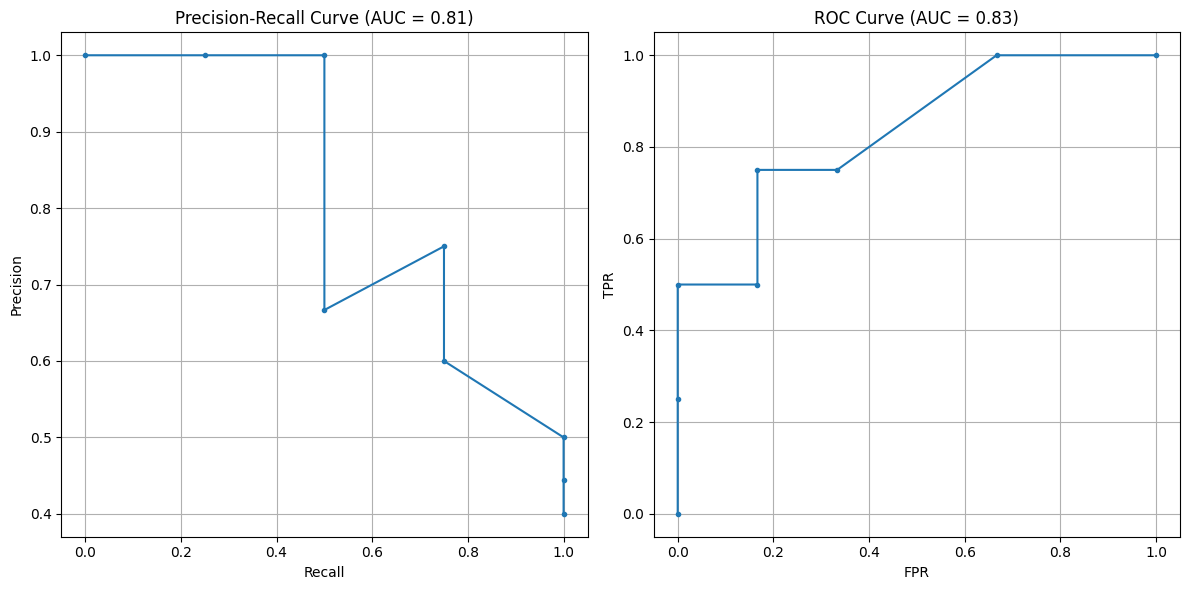

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, auc

# 模拟数据
Y_true = np.array([1,0,0,1,0,0,1,1,0,0])
Y_score = np.array([0.9,0.4,0.2,0.6,0.5,0.4,0.7,0.4,0.65,0.35])

precision, recall, _ = precision_recall_curve(Y_true, Y_score)
fpr, tpr, _ = roc_curve(Y_true, Y_score)

# 计算AUC值
pr_auc = auc(recall, precision)
roc_auc = auc(fpr, tpr)

# 画PR曲线
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (AUC = %0.2f)' % pr_auc)
plt.grid(True)

# 画ROC曲线
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, marker='.')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve (AUC = %0.2f)' % roc_auc)
plt.grid(True)

plt.tight_layout()
plt.show()
